In [ ]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 8.6 MB/s eta 0:00:00


Developed a Custom Missile Object Detection for the Israeli Missiles. For more projects and collaborations check out my GitHub: https://github.com/YadidyaM


In [ ]:
from ultralytics import YOLO
from IPython.display import Image,display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install roboflow

!curl -L "https://universe.roboflow.com/ds/jr1DOoWNba?key=Ms2dTOG2jD" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   904  100   904    0     0   3467      0 --:--:-- --:--:-- --:--:--  3476
100 5135k  100 5135k    0     0  5950k      0 --:--:-- --:--:-- --:--:-- 9389k
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/161_jpg.rf.ffd0592a16dc6c322fbe24c6041c6386.jpg  
 extracting: test/images/162_jpg.rf.29a885bab7855321043c77cfe31c91bf.jpg  
 extracting: test/images/165_jpg.rf.853648a24a4ed4ee97fa6d02ff14b6ba.jpg  
 extracting: test/images/222_jpg.rf.b76adc06b0cdfeafd3c3a9d6bbdd1a2f.jpg  
 extracting: test/images/227_jpg.rf.4f985ff2fb4bfbadec996325e2315a9c.jpg  
 extracting: test/images/231_jpg.rf.3081167ef53d9848b28ca7873462eb7f.jpg  
 extracting: test/images/234_jpg.rf.87b686711bc968dc

In [ ]:
!yolo task=detect mode=train model=yolo11n.pt data=/content/data.yaml epochs=80 imgsz=640 plots=True

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

# **View Training Results**

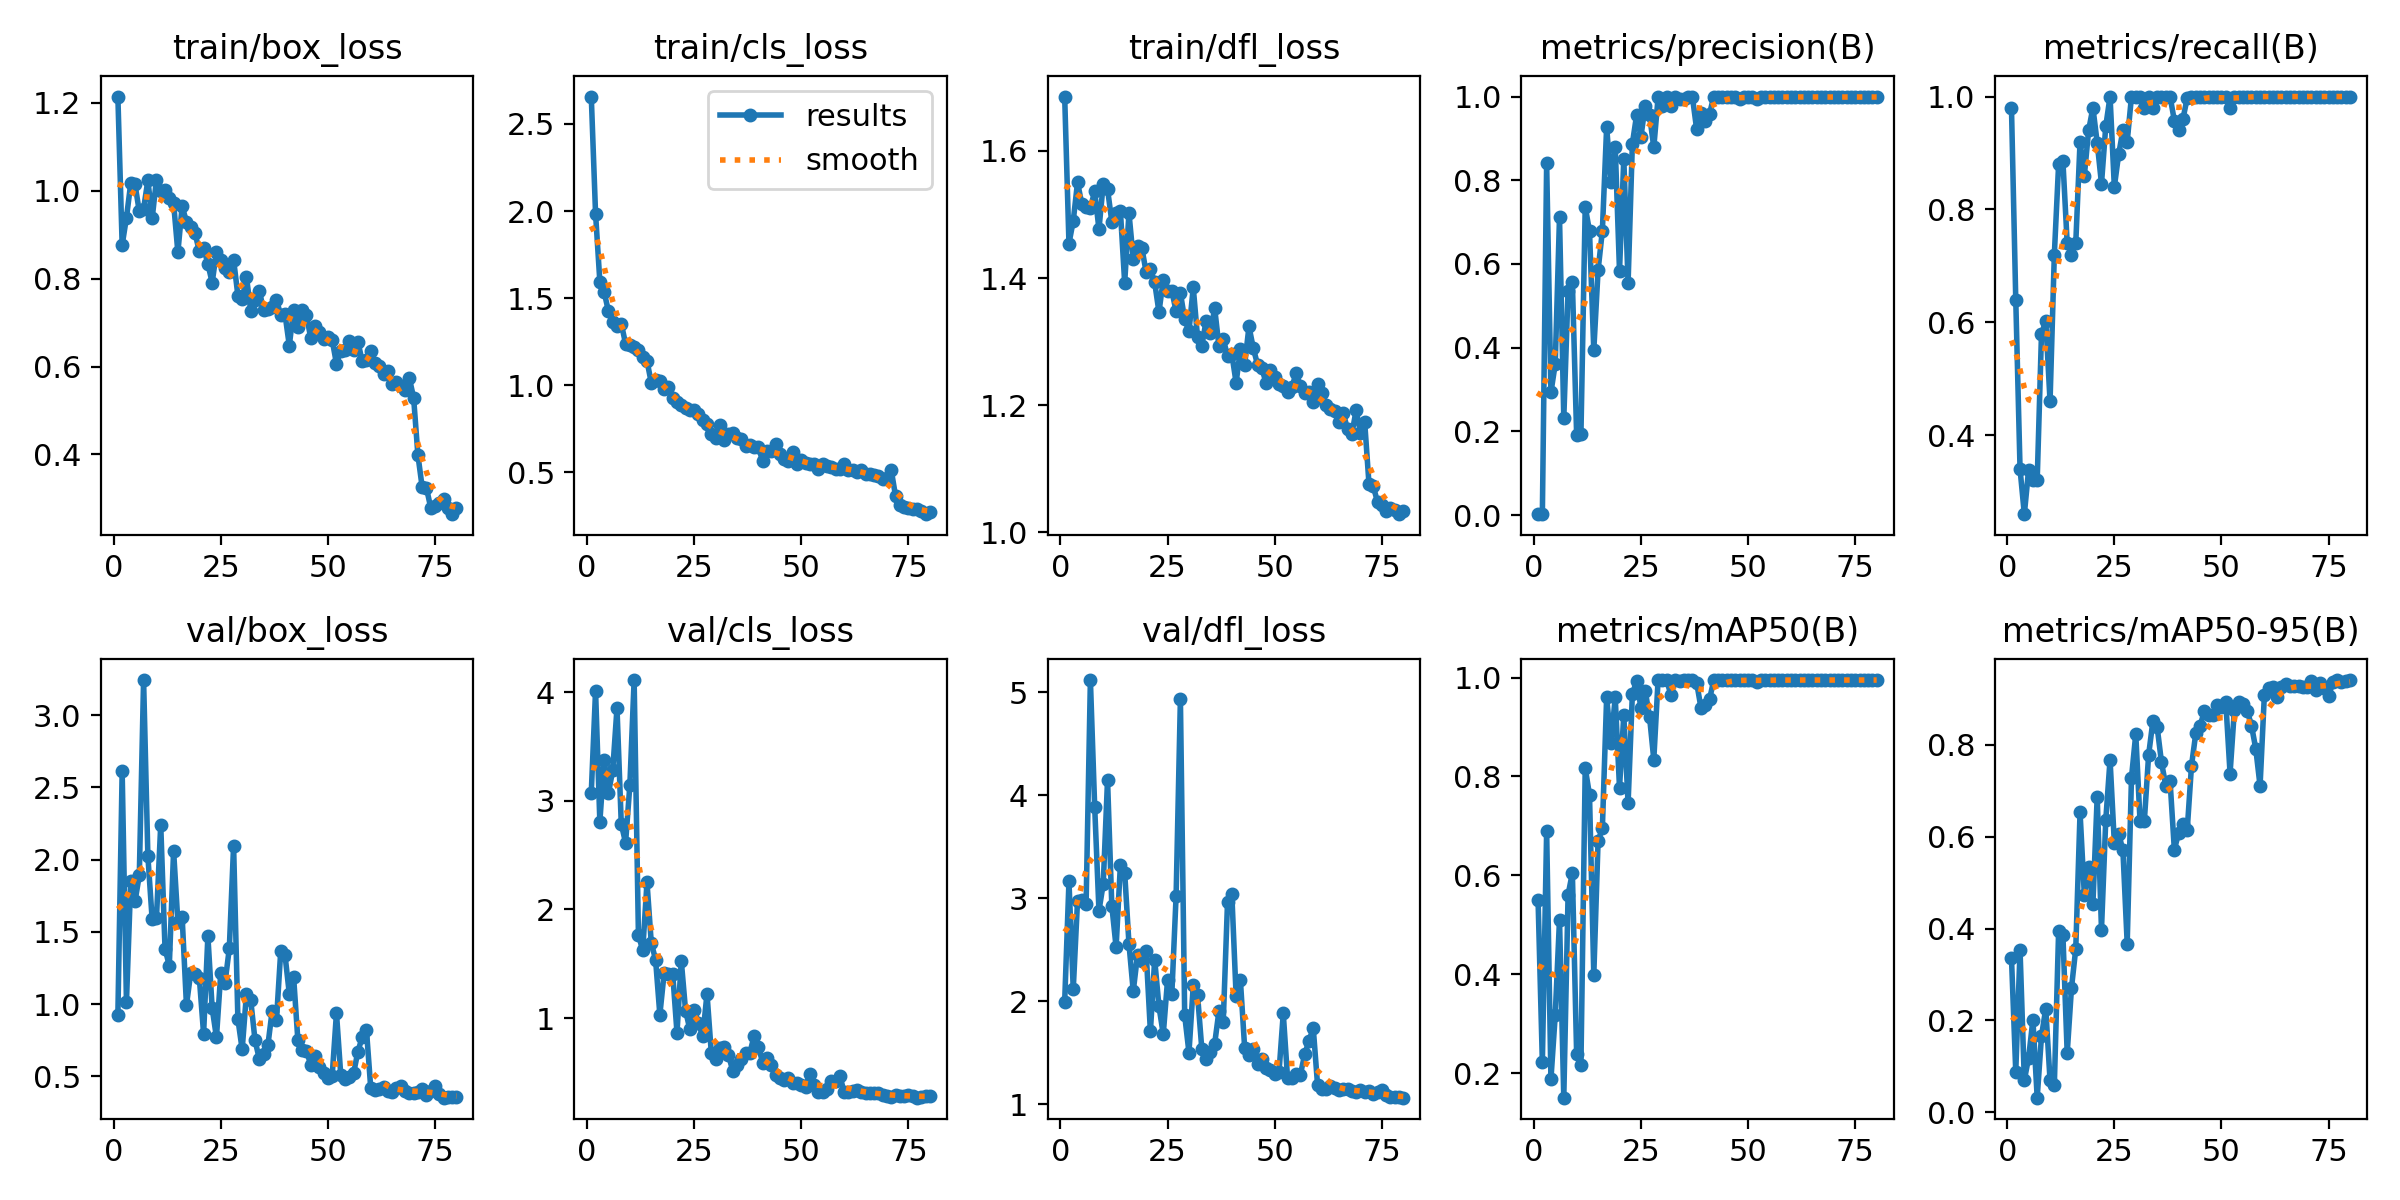

In [ ]:
display(Image(filename='/content/runs/detect/train2/results.png', width=600))

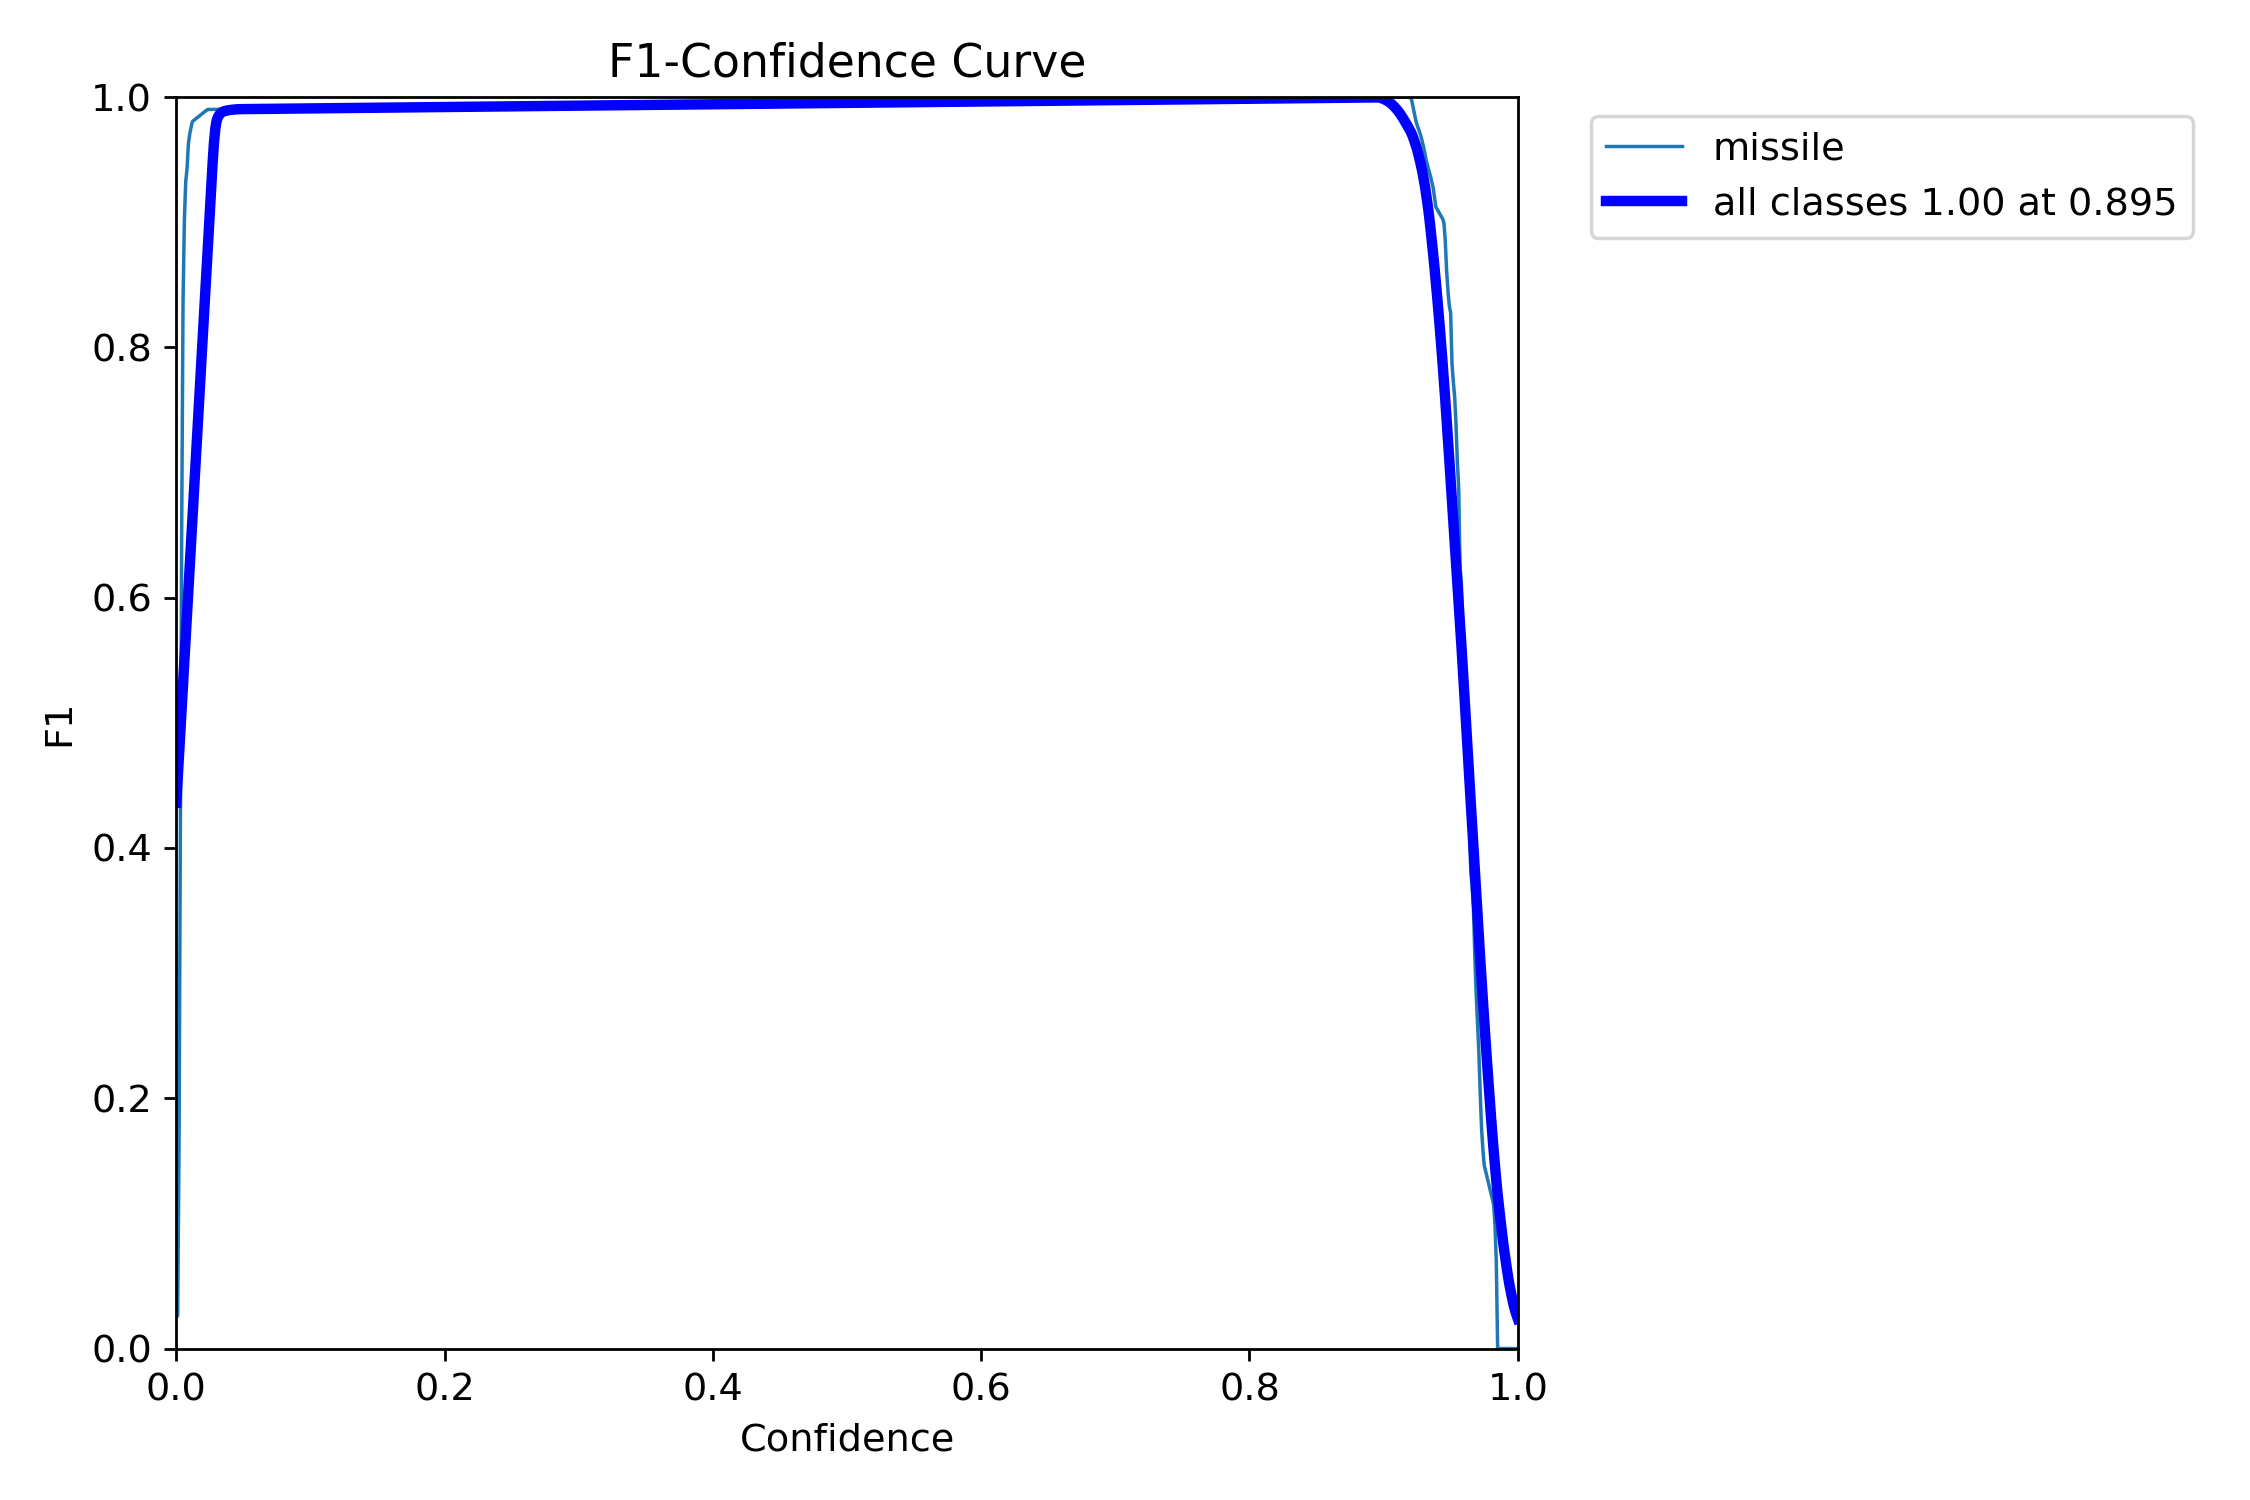

In [ ]:
display(Image(filename='/content/runs/detect/train2/F1_curve.png', width=600))

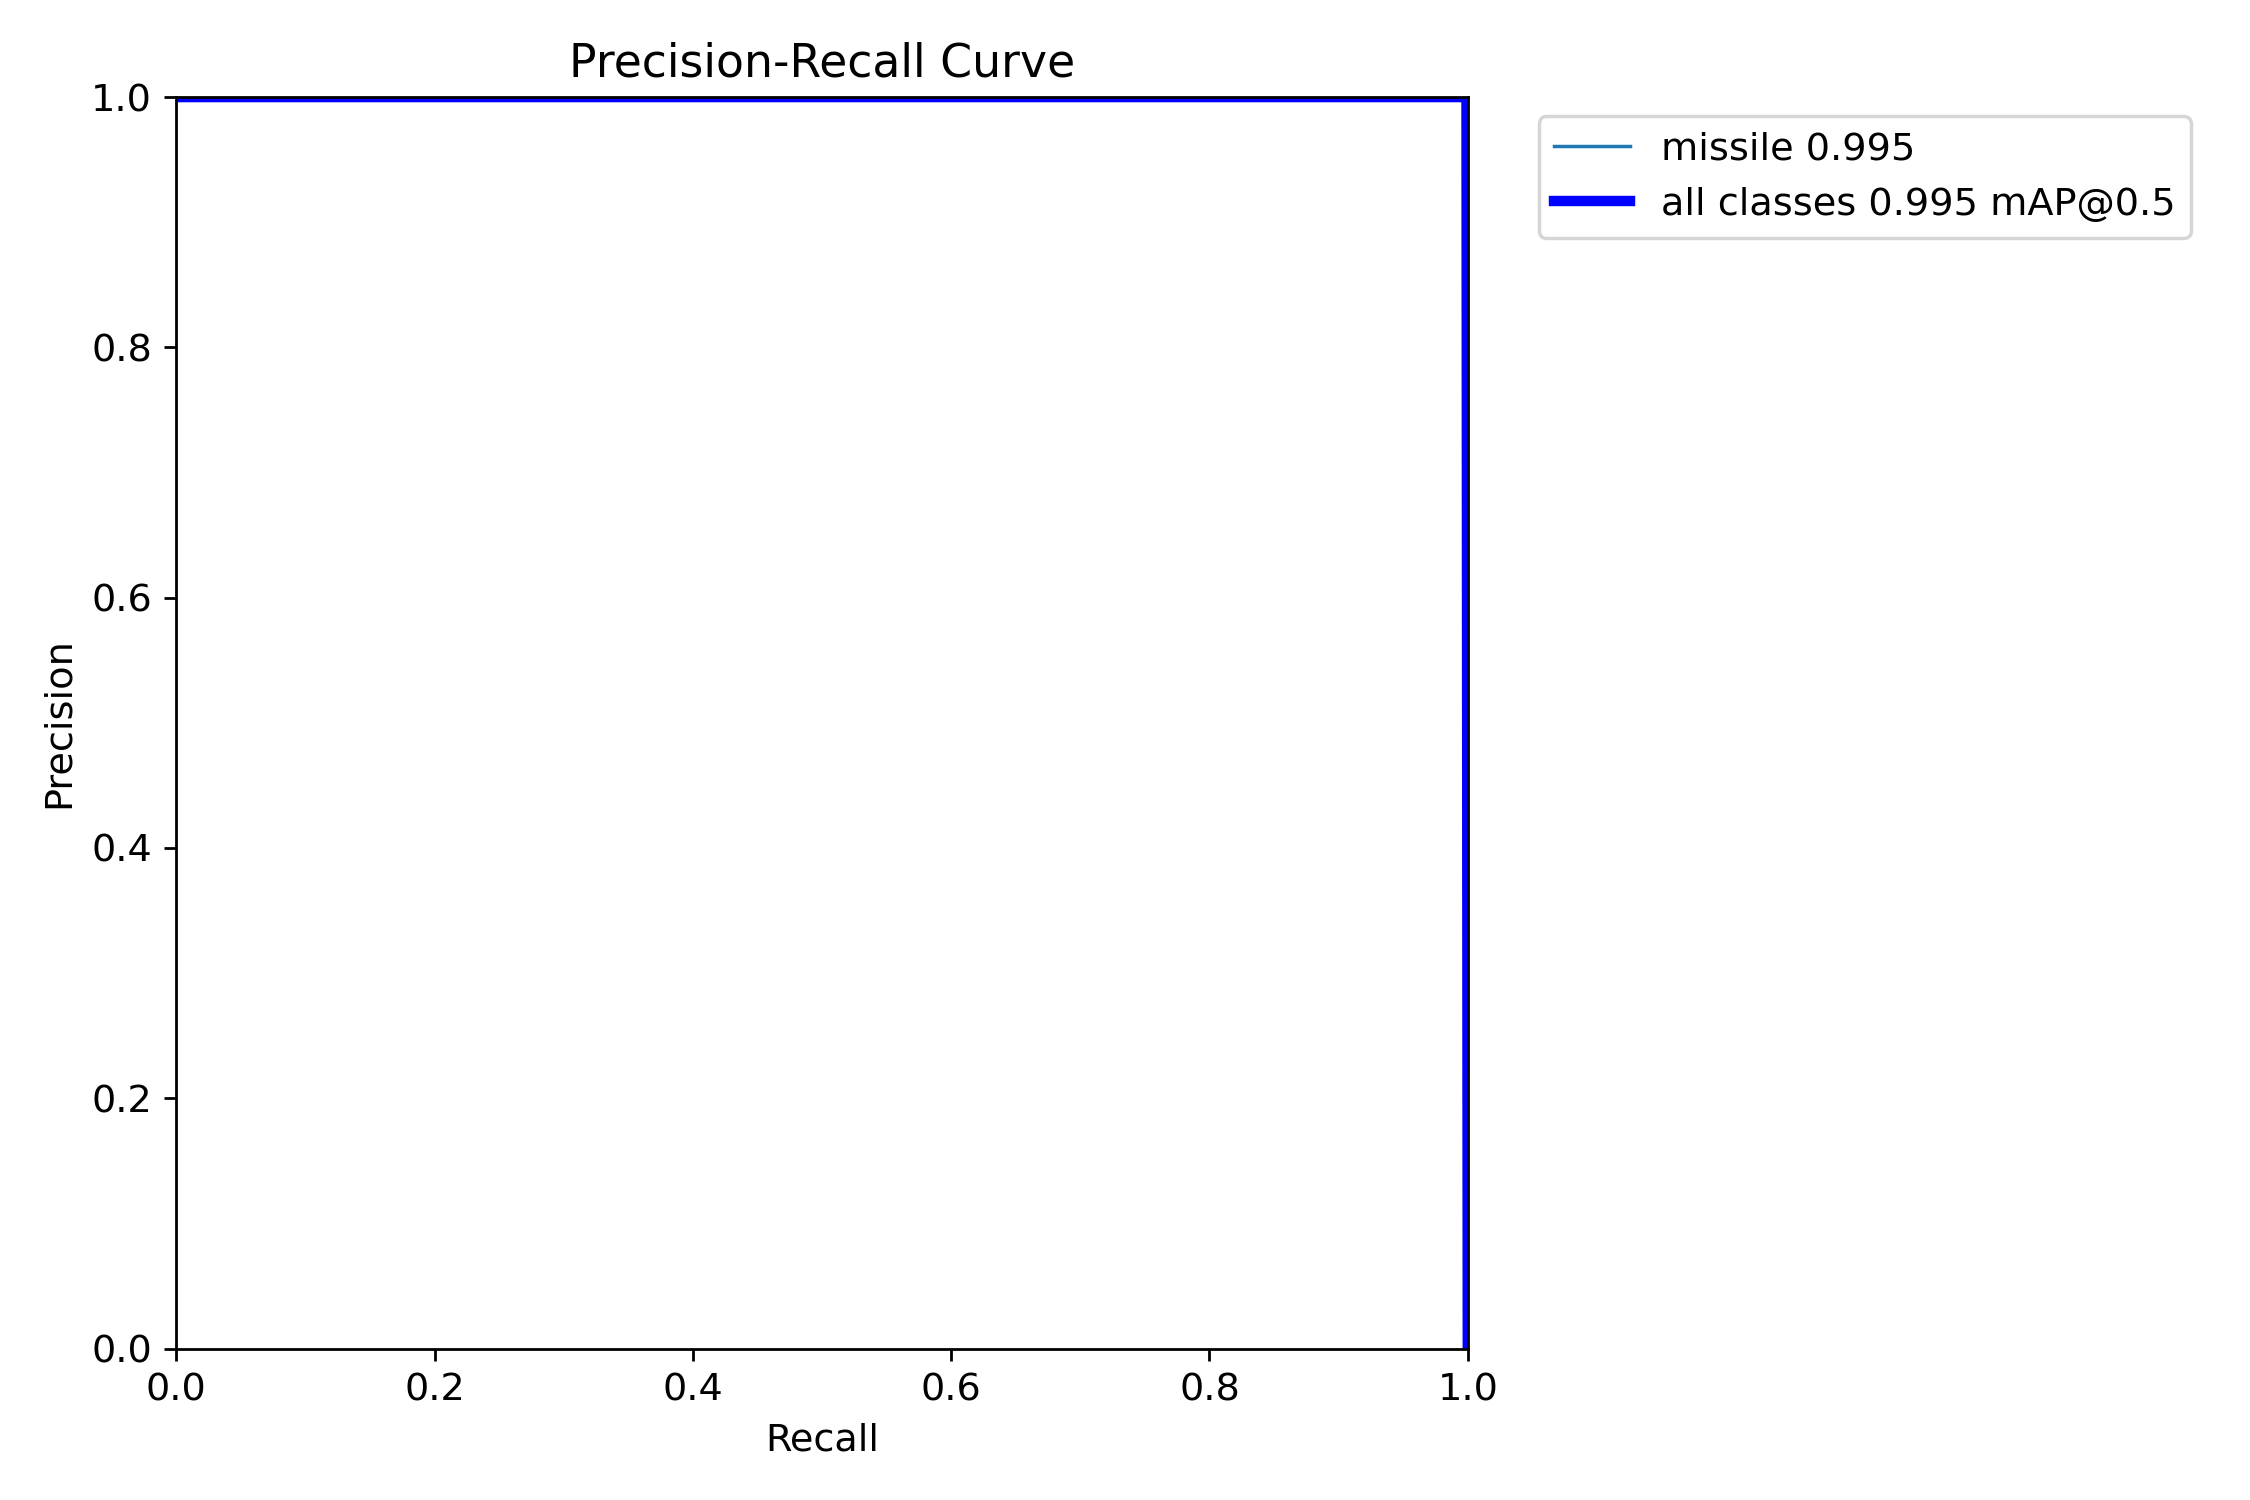

In [ ]:
display(Image(filename='/content/runs/detect/train2/PR_curve.png', width=600))

### **Validate fine-tuned model**

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/data.yaml

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100% 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:02<00:00,  1.85it/s]
                   all         50         50      0.999          1      0.995      0.941
Speed: 6.4ms preprocess, 10.7ms inference, 0.0ms loss, 12.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# **Inference with custom model**

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/test/images save=True

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/12 /content/test/images/161_jpg.rf.ffd0592a16dc6c322fbe24c6041c6386.jpg: 640x640 1 missile, 12.4ms
image 2/12 /content/test/images/162_jpg.rf.29a885bab7855321043c77cfe31c91bf.jpg: 640x640 1 missile, 13.4ms
image 3/12 /content/test/images/165_jpg.rf.853648a24a4ed4ee97fa6d02ff14b6ba.jpg: 640x640 1 missile, 10.9ms
image 4/12 /content/test/images/222_jpg.rf.b76adc06b0cdfeafd3c3a9d6bbdd1a2f.jpg: 640x640 1 missile, 10.7ms
image 5/12 /content/test/images/227_jpg.rf.4f985ff2fb4bfbadec996325e2315a9c.jpg: 640x640 1 missile, 10.6ms
image 6/12 /content/test/images/231_jpg.rf.3081167ef53d9848b28ca7873462eb7f.jpg: 640x640 1 missile, 10.4ms
image 7/12 /content/test/images/234_jpg.rf.87b686711bc968dc7385465a3340f990.jpg: 640x640 1 missile, 10.9ms
image 8/12 /content/test/images/236_jpg.rf.53ec97a89521c4739a89bbc1d5ebf336.jpg: 640x

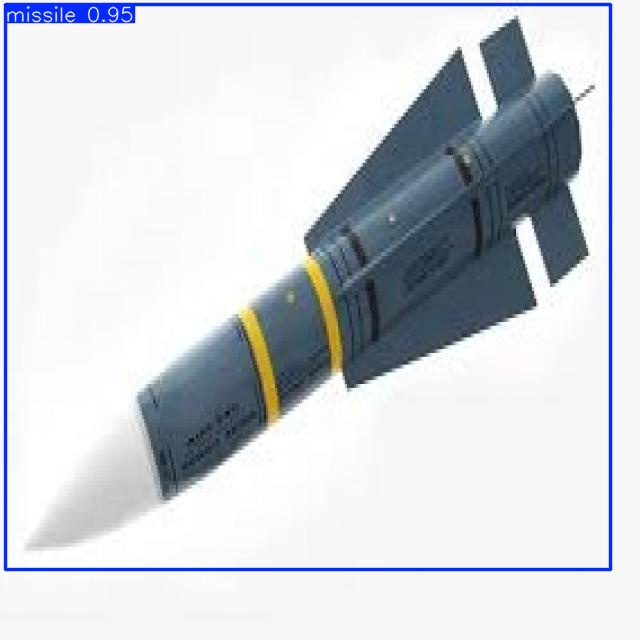

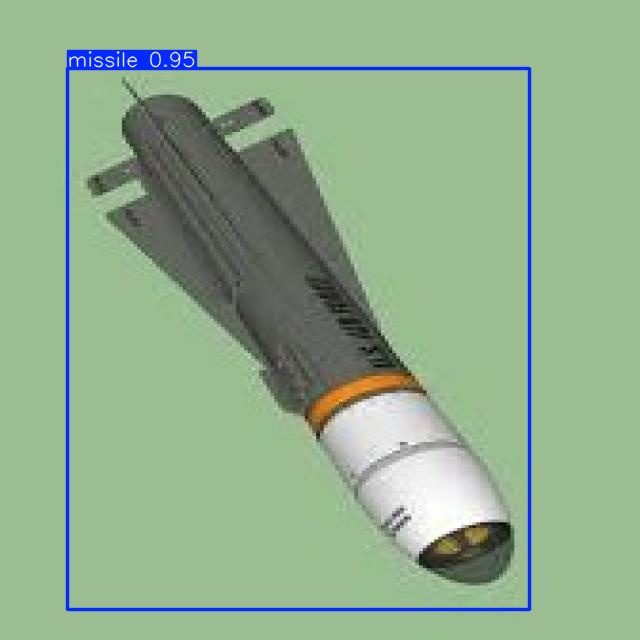

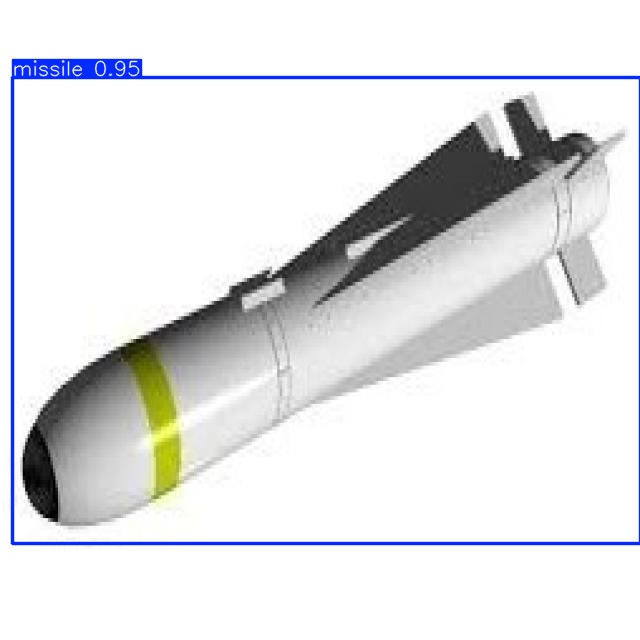

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
model = YOLO('/content/runs/detect/train2/weights/best.pt')

In [ ]:
!pip install opencv-python
import cv2 # Importing the cv2 module
import glob
import os
from IPython.display import Image as IPyImage, display

video_path = '/content/BrahMos test-firing with indigenous onboard systems (online-video-cutter.com).mp4'
output_path = '/content/missile_predictions.mp4'

cap = cv2.VideoCapture(video_path) # Now cv2 is defined
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

In [ ]:
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

In [ ]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    annotated_frame = results[0].plot()
    out.write(annotated_frame)

cap.release()
out.release()


0: 480x640 1 missile, 86.3ms
Speed: 11.9ms preprocess, 86.3ms inference, 1137.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 missile, 15.2ms
Speed: 2.9ms preprocess, 15.2ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 missile, 23.5ms
Speed: 2.8ms preprocess, 23.5ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 missile, 45.0ms
Speed: 4.8ms preprocess, 45.0ms inference, 8.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 missiles, 18.6ms
Speed: 3.0ms preprocess, 18.6ms inference, 4.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 missile, 15.2ms
Speed: 1.7ms preprocess, 15.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 missiles, 24.4ms
Speed: 1.7ms preprocess, 24.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 missiles, 25.0ms
Speed: 1.7ms preprocess, 25.0ms inference, 3.9ms postprocess per image at 